# Szeregi czasowe − plamy słoneczne

Julian Zubek, 2015, [DELab UW](http://www.delab.uw.edu.pl/)

In [6]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn

%matplotlib inline

## Plamy słoneczne

Ze względu na ryzyko uszkodzenia wzroku zwykle nie zdarza się nam patrzeć wprost w tarczę słoneczną. Jednak od czasu do czasu przy okazji zjawisk astronomicznych takich jak zaćmienia masowo zaopatrujemy się w stosowne przyrządy i obserwujemy Słońce. Możemy wówczas dostrzec na jego powierzchni plamy:

<img src="eclipse.jpg" width=300px />

Plama z bliska:

<img src="flare.jpg" width=300px />

Plamy słoneczne od dawna budziły zainteresowanie obserwatorów. W XIX wieku pojawiły się pierwsze dzienniki, których autorzy systematycznie zapisywali liczbę plam słonecznych każdego dnia. Obecnie dysponujemy wiarygodnymi danymi od 1818 roku.

In [4]:
dayssn = pd.read_csv("../dane/dayssn.dat", header=None, names=["date", "data_fraction", "spots"],
                     delim_whitespace=True, usecols=["date", "spots"], parse_dates=[0], na_values=["?"], index_col=0)
dayssn

,spots
date,
1818-01-01,NaN
1818-01-02,NaN
1818-01-03,NaN
1818-01-04,NaN
1818-01-05,NaN
1818-01-06,NaN
1818-01-07,NaN
1818-01-08,39
1818-01-09,NaN


In [5]:
dayssn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72104 entries, 1818-01-01 to 2015-05-31
Data columns (total 1 columns):
spots    68857 non-null float64
dtypes: float64(1)
memory usage: 1.1 MB


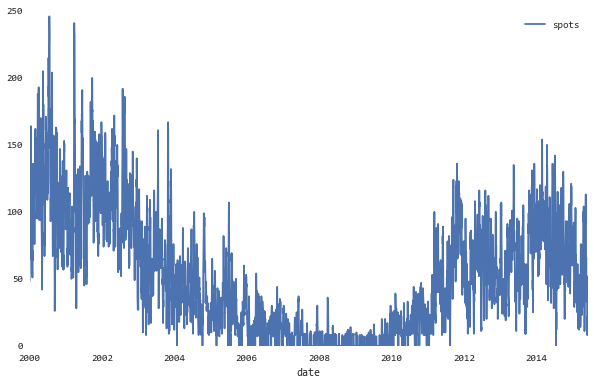

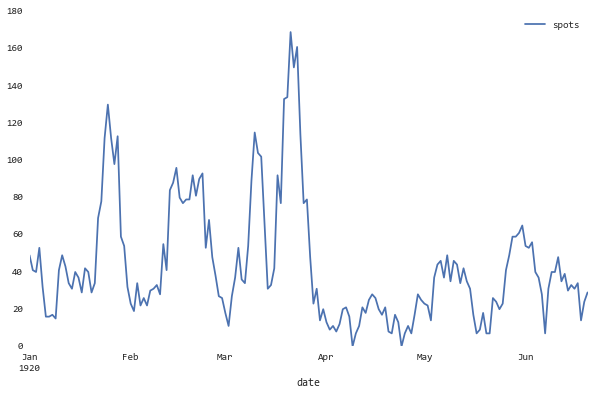

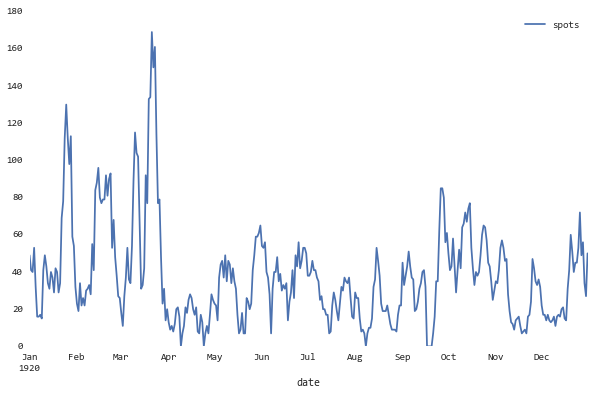

In [6]:
dayssn["2000-01-01":].plot(figsize=(10, 6))
dayssn["1920-01-01":"1920-06-20"].plot(figsize=(10, 6))
dayssn["1920"].plot(figsize=(10, 6))

Wykres możemy wygładzić licząc średnią po przesuwającym się oknie kreślonej wielkości. Biblioteka pandas dostarcza prostych w użyciu funkcji do tego rodzaju operacji.

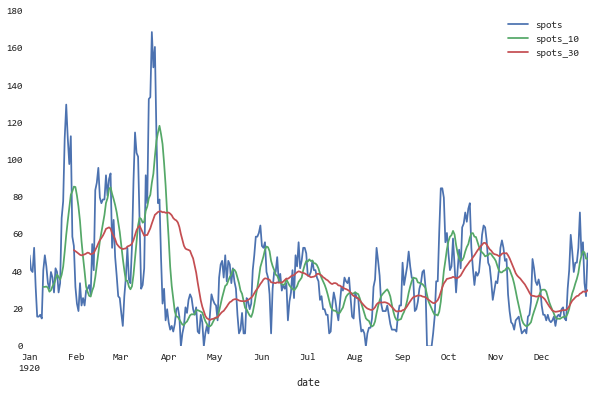

In [7]:
y1920 = dayssn["1920"]
a = pd.rolling_mean(y1920, 10)
a.columns = ["spots_10"]
b = pd.rolling_mean(y1920, 30)
b.columns = ["spots_30"]

d = pd.concat((y1920, a, b), axis=1)
d.plot(figsize=(10, 6))

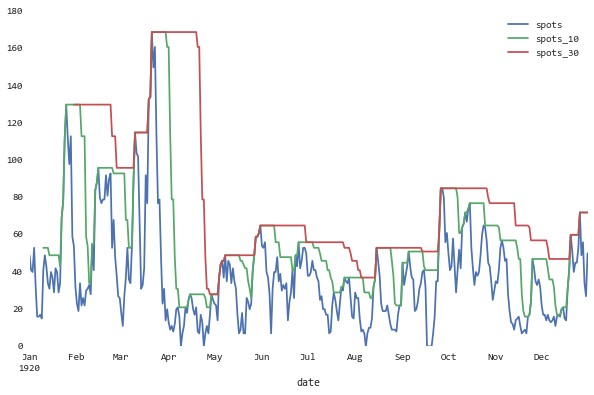

In [8]:
y1920 = dayssn["1920"]
a = pd.rolling_max(y1920, 10)
a.columns = ["spots_10"]
b = pd.rolling_max(y1920, 30)
b.columns = ["spots_30"]

d = pd.concat((y1920, a, b), axis=1)
d.plot(figsize=(10, 6))

Można zdefiniować własne funkcje operujące na przesuwnym oknie:

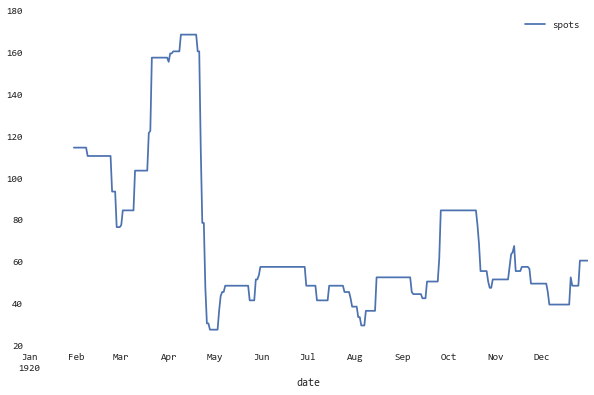

In [9]:
def amplitude(x):
    return x.max()-x.min()

pd.rolling_apply(y1920, 30, amplitude).plot(figsize=(10, 6))

Argument przekazywany do funkcji amplitude jest zwykłą pythonową listą (nie serią ani tablicą!). Przykładowa funkcja zwracająca liczbę obserwacji w zakresie [30,40) na oknie:

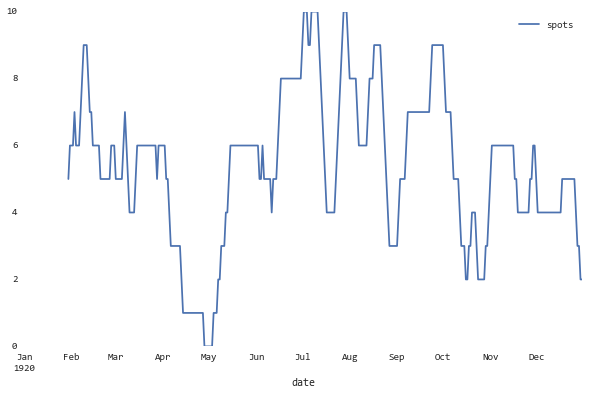

In [10]:
def in_range(x):
    s = 0
    for elem in x:
        if elem >= 30 and elem < 40:
            s += 1
    return s

pd.rolling_apply(y1920, 30, in_range).plot(figsize=(10, 6))

## Ćwiczenie

Być może analizowana sekwencja zawiera charakterystyczne wzorce, które pojawiają się wiele razy. Napisz funkcję operującą na przesuwnym oknie, które porównuje zawartość okna z początkowym fragmentem sekwencji y1920 o długości równej 30 dni. 

In [8]:
y = y1920[:30]

Funkcja powinna zwracać błąd średniokwadratowy pomiędzy aktualnym oknem $x$ a początkowym fragmentem $y$: $\frac{1}{n}\sum_{i=1}^n(x_i-y_i)^2$